In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
#import plotly.grath_objs as go
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
import os


### Кластеризация

In [3]:
data = pd.read_csv("opros_molodeshi.csv",encoding='ansi')
data

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [4]:
pd.set_option("display.max.columns",None)
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

Сделаем выборку из переменных и возьмём категорию = "Привычки тратить",как и в прошлой работе, и добавим  категориальную перменную = "Gender".

In [5]:
data1=data[["Finances","Shopping centres","Branded clothing","Entertainment spending","Spending on looks","Spending on gadgets","Spending on healthy eating","Gender"]]
data1.head()


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Gender
0,3.0,4.0,5.0,3.0,3.0,1,3.0,female
1,3.0,4.0,1.0,4.0,2.0,5,2.0,female
2,2.0,4.0,1.0,4.0,3.0,4,2.0,female
3,2.0,4.0,3.0,3.0,4.0,4,1.0,female
4,4.0,3.0,4.0,3.0,3.0,2,4.0,female


In [6]:
data1.shape

(1010, 8)

In [7]:
data2=data1.drop_duplicates()
mas=[i for i in data2.columns if data2[i].dtypes=='float64' or data2[i].dtypes=='int64']
for i in mas:
    if data2[i].isnull().sum()>0:
        data2[i]=data2[i].fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20808\1243258045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i]=data2[i].fillna(0)


Убираем дубликаты и пропуски

In [8]:
data2[i].isna().any()

False

Так как у нас только числовые значения используем ONE HOT ENCODING(OHE)

In [9]:
data3 = pd.get_dummies(data2["Gender"],drop_first = True)
data3

,male
0,0
1,0
2,0
3,0
4,0
...,...
1005,0
1006,1
1007,0
1008,0


In [29]:
data5 = pd.concat([data2, data3], axis=1).drop('Gender', axis=1)
data5


,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,male
0,3.0,4.0,5.0,3.0,3.0,1,3.0,0
1,3.0,4.0,1.0,4.0,2.0,5,2.0,0
2,2.0,4.0,1.0,4.0,3.0,4,2.0,0
3,2.0,4.0,3.0,3.0,4.0,4,1.0,0
4,4.0,3.0,4.0,3.0,3.0,2,4.0,0
...,...,...,...,...,...,...,...,...
1005,3.0,5.0,4.0,3.0,4.0,3,4.0,0
1006,3.0,1.0,1.0,1.0,1.0,5,3.0,1
1007,1.0,2.0,5.0,2.0,2.0,2,5.0,0
1008,3.0,2.0,1.0,5.0,3.0,3,3.0,0


Метод KMEANS

Text(0, 0.5, 'WCSS')

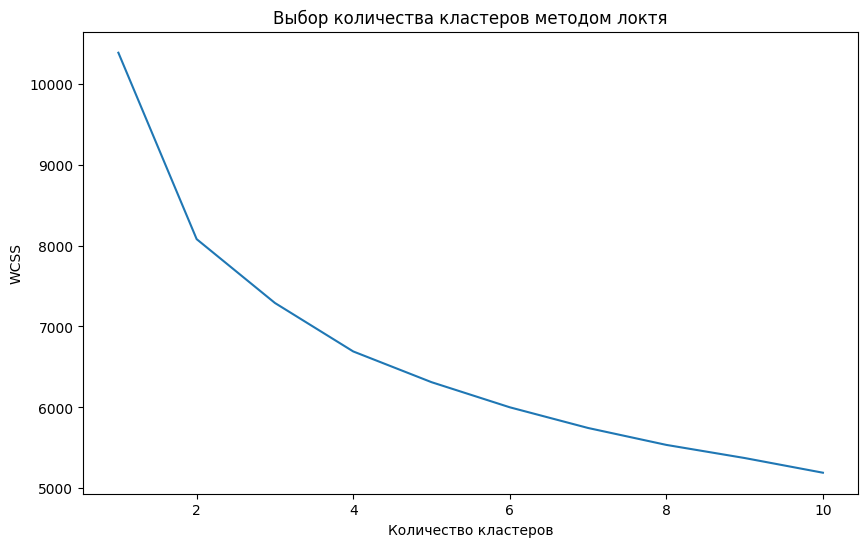

In [30]:
x1 = data5[["Finances","Shopping centres","Branded clothing","Entertainment spending","Spending on looks","Spending on gadgets","Spending on healthy eating","male"]]
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
 
# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):
    
    # настроим параметры модели 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(x1)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)
 
# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')


На графике видим что, перейдя от 4 до 5 кластеров,ошибка перестала существенно уменьшаться. Поэтому возьмём 4 кластера.

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = kmeans.fit_predict(x1)

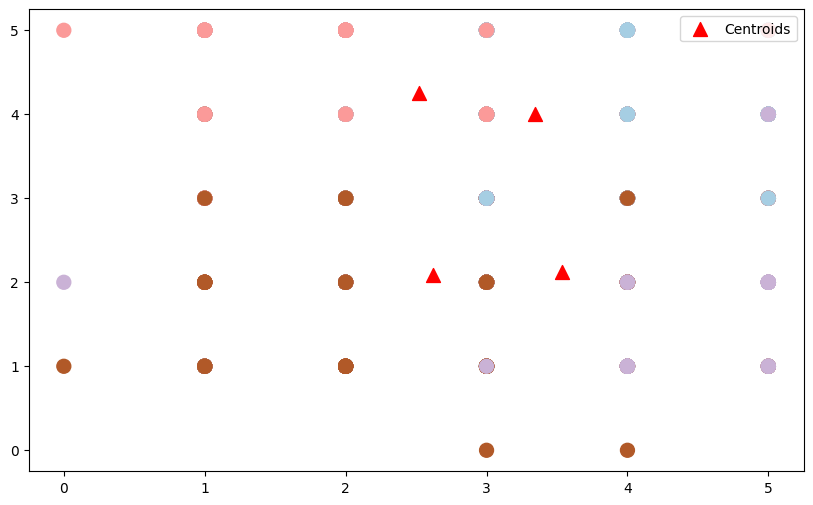

In [32]:
plt.figure(figsize = (10,6))
 
# снова построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(x1.iloc[:,0], x1.iloc[:,1], c = y_pred,s = 100, cmap='Paired')
 
# кроме того выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 150, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', marker = '^', label = 'Centroids')
 
# укажем, где разместить подпись
plt.legend(loc = 'upper right')


Метод DBSCAN

In [33]:
x = data5.loc[:,["Finances","Shopping centres","Branded clothing","Entertainment spending","Spending on looks","Spending on gadgets","Spending on healthy eating","male"]].values
x.shape

(951, 8)

Вычисление близости данных друг от друга с использованием ближайших соседей

In [34]:
from sklearn.neighbors import NearestNeighbors
# создание объекта класса ближайших соседей
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(x)  # подгонка данных к объекту
distances,indices=nbrs.kneighbors(x) #поиск ближайших соседей

Сортировка и построение графиков расстояний между точками данных

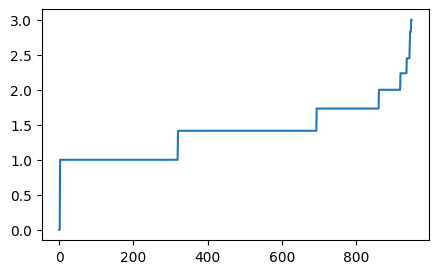

In [35]:
#Сортировка и построение результатов измерений расстояний
distances = np.sort(distances, axis=0)  # сортировка расстояний
distances = distances[:, 1]  # берем второй столбец отсортированных расстояний
plt.rcParams['figure.figsize'] = (5, 3)  # настройка размера фигуры
plt.plot(distances)  # построение графиков расстояний
plt.show() 


Из приведенного выше графика  видим, что максимальная кривизна кривой составляет около 2,5, и поэтому  выбираем наш Eps равным 2,5.А минимальные значения берем 16, так как наши данные многомерные, и мы перемножаем измерения на 2. Так как у нас 8 столбцов, то 8*2=16.

In [36]:
dbscan = DBSCAN(eps=2.5, min_samples=16).fit(x)  # подгонка модели
labels = dbscan.labels_  # получение ярлыков


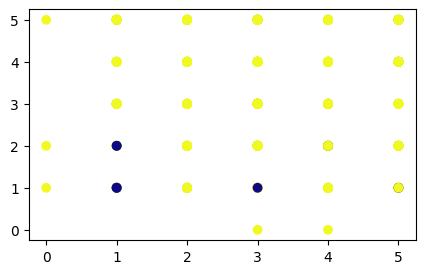

In [37]:
# построение графиков кластеров
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap="plasma")
plt.show()  


График в параллельных координатах

In [38]:
from pandas.plotting import parallel_coordinates
x2 = data5.drop(columns=["male"])

kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(x2)

x_kmeans = pd.DataFrame(kmeans)


x_kmeans1 = pd.concat([x2, x_kmeans], axis=1)


In [39]:
mas = [i for i in x_kmeans1.columns if x_kmeans1[i].dtypes ==
       'float64' or x_kmeans1[i].dtypes == 'int64']
for i in mas:
    if x_kmeans1[i].isnull().sum() > 0:
        x_kmeans1[i] = x_kmeans1[i].fillna(0)

        
x_kmeans1.isna().any()


Finances                      False
Shopping centres              False
Branded clothing              False
Entertainment spending        False
Spending on looks             False
Spending on gadgets           False
Spending on healthy eating    False
0                             False
dtype: bool

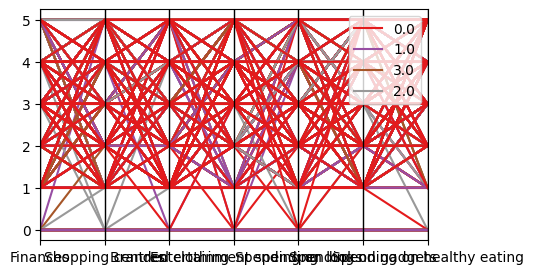

In [40]:
x_kmeans1.rename(columns={x_kmeans1.columns[7]: "Cluster"}, inplace=True)
parallel_coordinates(x_kmeans1, 'Cluster',
                     colormap=plt.get_cmap("Set1"))
plt.show()


In [41]:
import plotly.express as px

fig = px.parallel_coordinates(
    x_kmeans1,
    color="Cluster",
    labels={"Cluster": "Cluster", "Finances": "Finances", "Shopping centres": "Shopping centres",
            "Branded clothing": "Branded clothing", "Entertainment spending": "Entertainment spending", "Spending on looks": "Spending on looks", "Spending on gadgets": "Spending on gadgets", "Spending on healthy eating": "Spending on healthy eating"},
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2)

fig.update_layout(coloraxis_showscale=False)

fig.show()


Двумерные и трёхмерные графики

In [42]:
data5

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,male
0,3.0,4.0,5.0,3.0,3.0,1,3.0,0
1,3.0,4.0,1.0,4.0,2.0,5,2.0,0
2,2.0,4.0,1.0,4.0,3.0,4,2.0,0
3,2.0,4.0,3.0,3.0,4.0,4,1.0,0
4,4.0,3.0,4.0,3.0,3.0,2,4.0,0
...,...,...,...,...,...,...,...,...
1005,3.0,5.0,4.0,3.0,4.0,3,4.0,0
1006,3.0,1.0,1.0,1.0,1.0,5,3.0,1
1007,1.0,2.0,5.0,2.0,2.0,2,5.0,0
1008,3.0,2.0,1.0,5.0,3.0,3,3.0,0


График для двух переменных

In [43]:
from sklearn.cluster import KMeans
# k means
kmeans = KMeans(n_clusters=2, random_state=0)
data5['cluster'] = kmeans.fit_predict(data5[['Finances', 'male']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
data5['cen_x'] = data5.cluster.map({0: cen_x[0], 1: cen_x[1]})
data5['cen_y'] = data5.cluster.map({0: cen_y[0], 1: cen_y[1]})
# define and map colors
colors = ['#DF2020', '#81DF20']
data5['c'] = data5.cluster.map({0:colors[0], 1:colors[1]})

In [25]:
data4

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,male,cluster,cen_x,cen_y,c
0,3.0,4.0,5.0,3.0,3.0,1,3.0,0,0,2.990698,4.469767,#DF2020
1,3.0,4.0,1.0,4.0,2.0,5,2.0,0,0,2.990698,4.469767,#DF2020
2,2.0,4.0,1.0,4.0,3.0,4,2.0,0,0,2.990698,4.469767,#DF2020
3,2.0,4.0,3.0,3.0,4.0,4,1.0,0,0,2.990698,4.469767,#DF2020
4,4.0,3.0,4.0,3.0,3.0,2,4.0,0,1,3.055662,2.163148,#81DF20
...,...,...,...,...,...,...,...,...,...,...,...,...
1005,3.0,5.0,4.0,3.0,4.0,3,4.0,0,0,2.990698,4.469767,#DF2020
1006,3.0,1.0,1.0,1.0,1.0,5,3.0,1,1,3.055662,2.163148,#81DF20
1007,1.0,2.0,5.0,2.0,2.0,2,5.0,0,1,3.055662,2.163148,#81DF20
1008,3.0,2.0,1.0,5.0,3.0,3,3.0,0,1,3.055662,2.163148,#81DF20


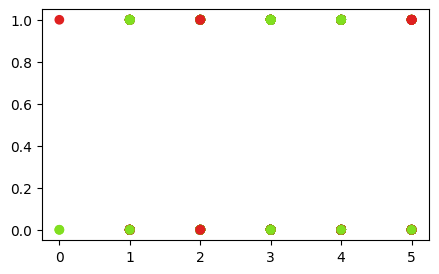

In [46]:
plt.scatter(data5.Finances, data5.male, c=data5.c)


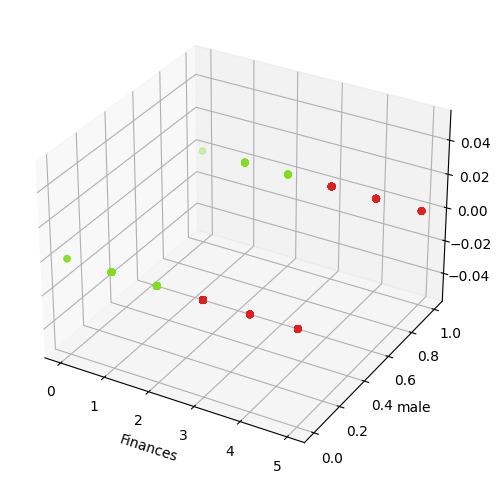

In [47]:
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
colors = ['#DF2020', '#81DF20']
kmeans = KMeans(n_clusters=2, random_state=0)
data5['cluster'] = kmeans.fit_predict(data5[['Finances', 'male']])
data5['c'] = data5.cluster.map({0: colors[0], 1: colors[1]})
fig = plt.figure(figsize=(26, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data5.Finances, data5.male, c=data5.c, s=20)
ax.set_xlabel('Finances')
ax.set_ylabel('male')
plt.show()
